<a href="https://colab.research.google.com/github/napoles-uach/covid19mx/blob/master/dgl_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install dgl

In [0]:
import dgl
import numpy as np
import pandas as pd


In [0]:
!pip install chart_studio
import plotly.express as px
import chart_studio.plotly as py

In [0]:
df3=pd.read_csv("https://raw.githubusercontent.com/napoles-uach/covid19mx/master/estadoslatlon.csv")
df2=pd.read_csv('https://raw.githubusercontent.com/napoles-uach/covid19mx/master/DensPob.csv')
estados_list=df3["Estado"].to_list()
lat_list=df3["Lat"]
lon_list=df3['Long']

In [5]:
densidad=df2.sort_values(by=['Densidad'])
fig = px.bar(densidad, y="Estado", x="Densidad", orientation='h',height=800,width=800,labels={'Densidad':'Population Density [inhabitants per square km]','Estado':'State'})
fig.show()


In [0]:
G=dgl.DGLGraph()

In [0]:
G.add_nodes(32)

In [0]:
import numpy as np
def build_map():
  src=np.array([0 ,0 ,0 ,0 ,
                1 ,1 ,1 ,1 ,
                2 ,2 ,2 ,2 ,2 ,2 ,
                3 ,3 ,3 ,
                4 ,4 ,4 ,4 ,4 ,4 ,
                5 ,5 ,5 ,
                6 ,6 ,6 ,
                7 ,7 , 
                8 ,8 ,8 ,8 ,8 , 
                9 ,9 ,9 ,9 ,9 ,9 , 
                10 ,10 ,10 ,10 ,10 ,
                11 ,11 ,11 ,11 ,
                12 ,12 ,12 ,12 ,12 ,12 ,
                13 ,13 ,13 ,13 ,
                14  ,14 ,14 ,14 ,14 ,14 ,14 ,
                15 , 15 ,15 ,
                16 ,
                17 ,17 ,17 ,17 , 
                18 ,18 ,18 ,18 , 18 ,
                19 ,19 ,19 ,
                20 ,20 ,20 ,20 ,
                21 ,21 ,21 ,21 ,
                22 ,22 ,22 ,22 ,22 ,22 ,22 ,22 ,
                23 ,23 ,23 ,23 ,
                24 ,24 ,24 ,24 ,24 ,24 ,
                25 ,25 ,25 ,25 ,25 ,
                26 ,26 ,26 ,
                27 ,27 ,27 ,
                28 ,28 ,28 ,28 ,28 ,
                29 ,29 ,29 ,29 ,29 ,
                30 ,30 ,30 ,30 ,
                31 ,31 ,31 ,
                32 ,32 ,32 ,32 ,32 ,
                33 ,33 ,33 ,33 ,33 ,33 ,
                34 ,34 ,34 ,34 ,
                35 ,35 ,35 ,35 ,35 ,35 ,
                36 ,36 ,
                37 ,37 ,
                38 ,38 ,38 ,38 ,38 ,38 ,
                39 ,39 ,39 ,39 ,39 ,39 ,39 ,39 ,
                40 ,40 ,40 ,40 ,
                41 ,41 ,41 ,41 ,41 ,41 ,
                42 ,42 ,42 ,
                43 ,43 ,43 ,43 ,43 ,
                44 ,44 ,
                45 ,45 ,45 ,45 ,45 ,
                46 ,46 ,46 ,46 ,
                47 ,47 ,47 ,47 ,47 ,47])
  dst=np.array([ 21, 39, 7, 8,
       3, 25, 41, 28,
       15, 40, 33, 22, 39, 21,
       34, 25, 1,
       28, 41, 47, 24, 13, 33,
       29, 18, 36,
       17, 25, 27,
       0, 8,
       0, 7, 39, 37, 30, 
       25, 24, 44, 23, 47, 41,
       22, 12, 46, 11, 14,
       14, 10, 19, 32,
       24, 38, 20, 46, 10, 22,
       4, 24, 22, 33,
       22, 10, 11, 32, 45, 43, 39,
       40, 2, 21,
       26,
       45, 43, 35, 6,
       29, 42, 26, 5, 36,
       11, 32, 46,
       31, 38, 12, 46,
       15, 2, 39, 0,
       33, 13, 24, 12, 10, 14, 39, 2,
       9, 47, 31, 38,
       4, 47, 38, 12, 22, 13,
       1, 3, 34, 9, 41,
       16, 42, 18,
       6, 35, 29,
       1, 41, 4, 33, 40,
       35, 27, 42, 18, 5,
       23, 38, 20,
       19, 11, 14, 45, 35,
       40, 28, 4, 13, 22, 2,
       44, 9, 25, 3,
       32, 45, 17, 27, 29,
       5, 18,
       8, 30,
       47, 23, 31, 20, 12, 24,
       21, 2, 22, 14, 43, 30, 8, 0,
       28, 33, 2, 15,
       28, 1, 25, 9, 47, 4,
       26, 29, 18,
       45, 17, 14, 39, 30,
       9, 34,
       32,  35, 17, 43, 14,
       20, 12, 10, 19,
       9, 23, 38, 24, 41, 4])
  u=np.concatenate([src,dst])
  v=np.concatenate([dst,src])
  return dgl.DGLGraph((u,v))

In [0]:
G=build_map()

In [10]:
print(G.number_of_nodes())
print(G.number_of_edges())

32
264


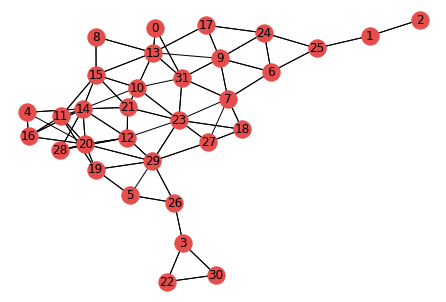

In [11]:
import networkx as nx
nx_G = G.to_networkx().to_undirected()
pos = nx.kamada_kawai_layout(nx_G)

nx.draw(nx_G, pos, with_labels=True, node_color=[[.9, .3, .3]])



In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

embed = nn.Embedding(32, 32)  

In [0]:
x = torch.arange(0,32)
G.ndata['feat'] =torch.nn.functional.one_hot(x)

In [14]:
for i in range(32):
  G.ndata['feat'][i]=G.ndata['feat'][i]*df2['Densidad'][i]


print(G.ndata['feat'][31])

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 21])


In [0]:
from dgl.nn.pytorch import GraphConv


In [0]:
class GCN(nn.Module):
    def __init__(self, in_feats, hidden_size, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GraphConv(in_feats, hidden_size)
        self.conv2 = GraphConv(hidden_size, num_classes)

    def forward(self, g, inputs):
        h = self.conv1(g, inputs)
        h = torch.relu(h)
        h = self.conv2(g, h)
        return h


net = GCN(32, 5, 3)

In [0]:
inputs = embed.weight
labeled_nodes = torch.tensor([3,17,13,18,4,1])  
labels = torch.tensor([0,0,1,1,2,2])  

In [0]:
import itertools

optimizer = torch.optim.Adam(itertools.chain(net.parameters(), embed.parameters()), lr=0.01)
all_logits = []
for epoch in range(250):
    logits = net(G, inputs)
    # we save the logits for visualization later
    all_logits.append(logits.detach())
    logp = F.log_softmax(logits, 1)
    # we only compute loss for labeled nodes
    loss = F.nll_loss(logp[labeled_nodes], labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print('Epoch %d | Loss: %.4f' % (epoch, loss.item()))

In [0]:
import pandas as pd
df=pd.DataFrame(all_logits[249][:].numpy())

In [0]:
lista=[]
for i in range(32):
  lista.append((all_logits[249][i].numpy().argmax()))

df['li']=pd.Series(lista)

In [0]:
df['Lat']=lat_list
df['Long']=lon_list
df['Estado']=estados_list

In [22]:
df

0         1         2  ...        Lat        Long               Estado
0    0.539033 -0.988151 -2.342771  ...  21.882340 -102.282593       AGUASCALIENTES
1   -8.055016 -8.126482  2.798317  ...  32.627811 -115.454460      BAJA CALIFORNIA
2    5.331813 -5.197880 -3.291242  ...  24.144369 -110.300499  BAJA CALIFORNIA SUR
3    7.268159 -5.539064 -4.570120  ...  19.843861  -90.525543             CAMPECHE
4   -5.709216 -5.603298  3.156803  ...  19.428471  -99.127663     CIUDAD DE MÉXICO
5    1.893509 -3.581455 -2.489031  ...  16.759729  -93.113083              CHIAPAS
6   -0.444701 -4.246380 -4.838334  ...  28.635281 -106.088890            CHIHUAHUA
7   -2.957589 -0.687818 -6.747128  ...  25.423210 -101.005302             COAHUILA
8   -1.122786 -0.796723 -3.340977  ...  19.249970 -103.727142               COLIMA
9    0.435136 -2.681562 -7.059861  ...  25.569851 -103.495880              DURANGO
10  -5.276000 -0.947533 -5.667129  ...  21.018580 -101.259102           GUANAJUATO
11  -6.510108 -5.401522  0.953889  ...  16.849420  -99.908913             GUERRERO
12  -7.825843 -3.603290 -2.066155  ...  20.116970  -98.733292              HIDALGO
13  -7.367596  0.649759 -8.989139  ...  20.666821 -103.391823              JALISCO
14 -11.072613 -5.805916 -0.999484  ...  19.287861  -99.653236               MÉXICO
15  -6.347424 -2.569740 -3.657847  ...  19.700781 -101.184433            MICHOACÁN
16  -7.182647 -5.913308  1.988515  ...  18.926100  -99.230751              MORELOS
17   4.598552 -3.697920 -3.590333  ...  21.509510 -104.895691              NAYARIT
18  -7.947001  1.045871 -9.515673  ...  25.675070 -100.318466           NUEVO LEÓN
19  -5.490106 -3.781100 -0.439797  ...  17.065420  -96.723648               OAXACA
20  -8.868391 -6.611191  1.131404  ...  19.064060  -98.303520               PUEBLA
21  -8.647188 -1.297519 -6.136995  ...  20.588060 -100.388061            QUERETARO
22   4.407676 -3.556217 -2.932096  ...  21.174290  -86.846558         QUINTANA ROO
23  -8.616764  0.228942 -9.021552  ...  22.149820 -100.979156      SAN LUIS POTOSÍ
24  -1.305719 -3.048151 -2.893997  ...  23.232901 -106.406197              SINALOA
25   7.809262 -6.731363 -5.100936  ...  29.102600 -110.977318               SONORA
26  -1.545560 -2.006822 -2.344992  ...  17.986891  -92.930283              TABASCO
27  -6.748644  0.546085 -7.813524  ...  26.080610  -98.288353           TAMAULIPAS
28  -5.867174 -4.096364  0.296466  ...  19.319050  -98.199820             TLAXCALA
29  -5.617103 -3.352699 -5.649369  ...  19.180950  -96.142899             VERACRUZ
30   4.045563 -3.275026 -2.714460  ...  20.400417  -89.134857              YUCATÁN
31  -6.289273  0.294253 -9.033875  ...  22.768430 -102.581410            ZACATECAS

[32 rows x 7 columns]

In [23]:
fig = px.scatter_geo(df, lat="Lat",lon="Long", color='li',size=df['li']+1,
                     #animation_frame="Fecha",
                     scope='north america',#range_color=[0,max(todos['conteo'])],
                     center={'lat':19,'lon':-99},width=800,text = df['Estado'],
                     projection="natural earth")


fig.show()